In [2]:
# Limpeza e tratamento de dados
import pandas as pd
import seaborn as sbn
import statistics as sts

In [3]:
# importar dados
dataset = pd.read_csv("csvs/Churn.csv", sep=";")
# visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# tamanho
dataset.shape

(999, 12)

In [5]:
# primeiro e dar nome as colunas
# e preciso comprender o que cada dado trata por isso mudamos os cabecalhos

dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
# analise exploratoria
# objetico: Conhecer os dados
# detectar eventuais problemas que os dados tenham
# existem regras de negocios que sao universais. ex idade nao pode ser negativa

# valores faltantes subscituimos com mediana quando sao valores numericos e com a moda quando sao categoricos

agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

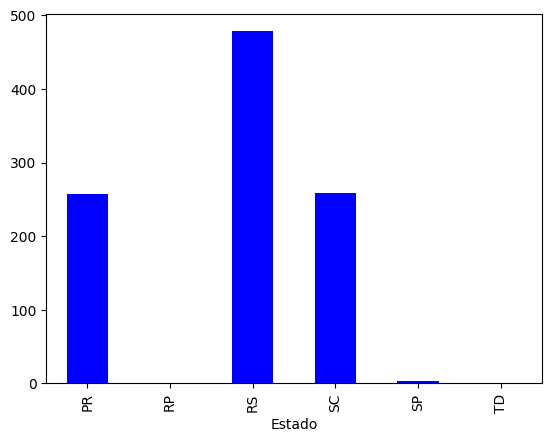

In [7]:
# chart
# analise exploratoria serve para conhecer os dados
# podemos explorar dados gerando graficos
# os estados tem que pertncer a regra de negocio por questao de dominio
# substituir os estados invalidos com a moda

agrupado.plot.bar(color='blue')

In [8]:
# genero
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

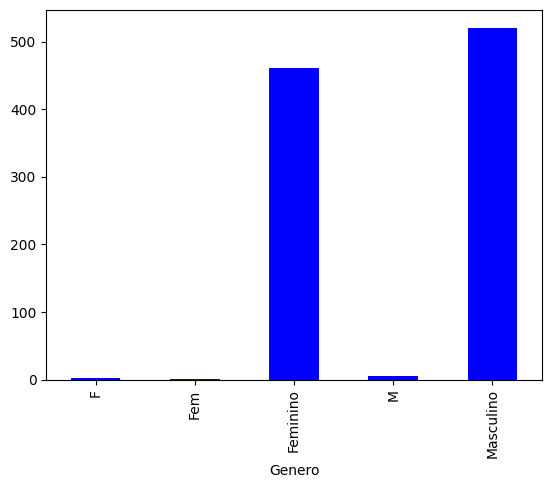

In [9]:
agrupado.plot.bar(color='blue')

In [10]:
# explorar colunas numericas
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

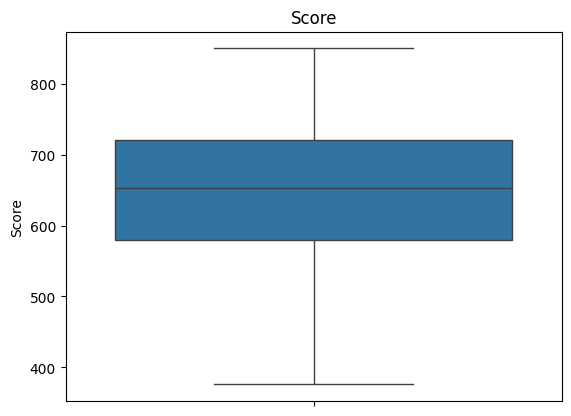

In [11]:
sbn.boxplot(dataset['Score']).set_title('Score')

/tmp/ipykernel_5296/1204821981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataset['Score']).set_title('Score') #  histograma


Text(0.5, 1.0, 'Score')

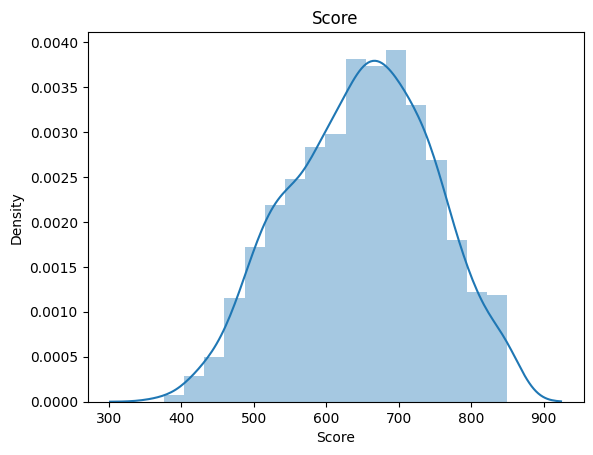

In [12]:
sbn.distplot(dataset['Score']).set_title('Score') #  histograma

In [13]:
# Idade
dataset['Idade'].describe() # nao se pode ter uma idade negativa por exemplo. deve ser corrigido
# mesmo 140 e demais para a uma idade

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

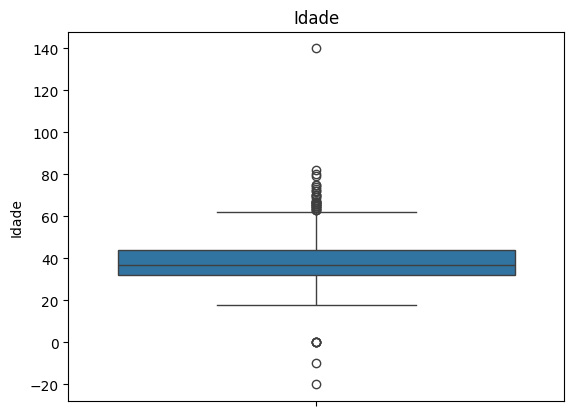

In [14]:
sbn.boxplot(dataset['Idade']).set_title('Idade') 

/tmp/ipykernel_5296/803384364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataset['Idade']).set_title('Idade')  # histograma


Text(0.5, 1.0, 'Idade')

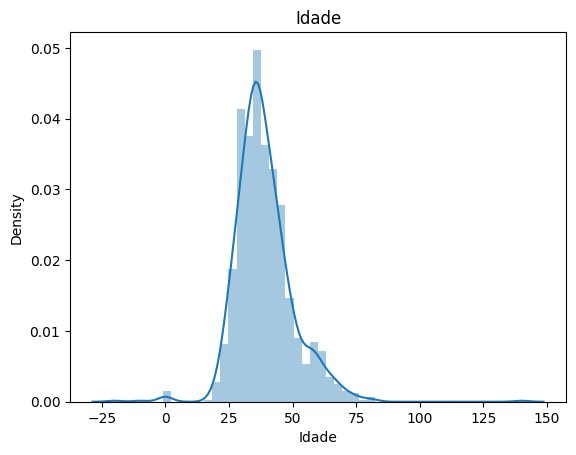

In [15]:
sbn.distplot(dataset['Idade']).set_title('Idade')  # histograma

In [16]:
# saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

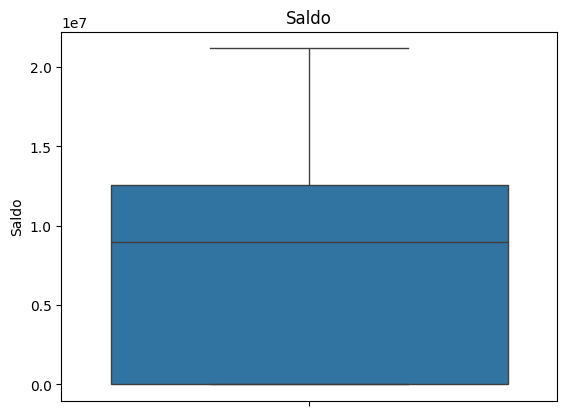

In [17]:
sbn.boxplot(dataset['Saldo']).set_title('Saldo')

/tmp/ipykernel_5296/823464510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataset['Saldo']).set_title('Saldo')


Text(0.5, 1.0, 'Saldo')

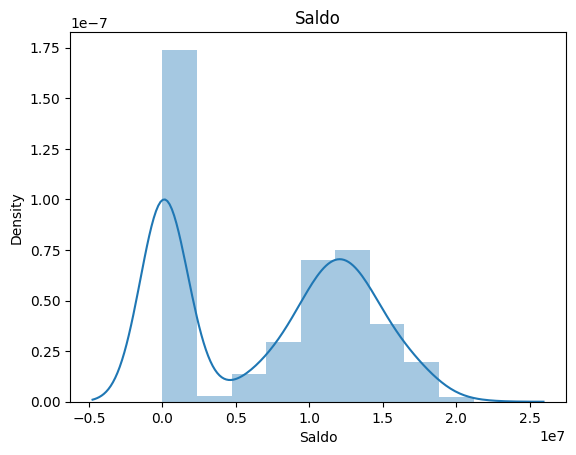

In [18]:
sbn.distplot(dataset['Saldo']).set_title('Saldo')

In [19]:
# salario
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

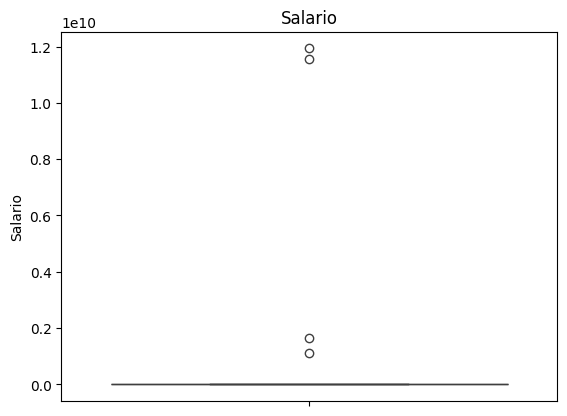

In [20]:
sbn.boxplot(dataset['Salario']).set_title('Salario')

/tmp/ipykernel_5296/1444723372.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(dataset['Salario']).set_title('Salario')


Text(0.5, 1.0, 'Salario')

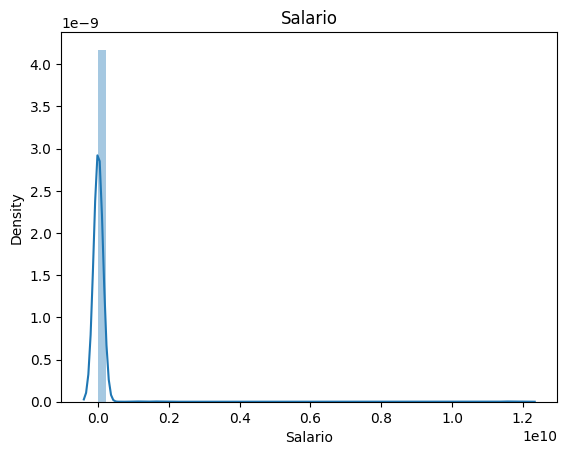

In [21]:
sbn.distplot(dataset['Salario']).set_title('Salario')

In [22]:
# contar os valores nulos
# outliers - sao valores fora do padrao normal

# genero e salario
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [23]:
# Tratamento dos dados propriamente dita
# Aula 10 - 65

In [24]:
mediana_salario = sts.median(dataset['Salario'])
mediana_salario

70518.0

In [25]:
# substituir NAN com por mediana
dataset['Salario'].fillna(mediana_salario, inplace=True)

/tmp/ipykernel_5296/4030609481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Salario'].fillna(mediana_salario, inplace=True)


In [26]:
# verificar se ainda existem valores NAN
dataset['Salario'].isnull().sum()

np.int64(0)

In [27]:
# genero, falta de padroniazacao e NAs
agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [28]:
# verificas NAN
dataset['Genero'].isnull().sum()

np.int64(8)

In [29]:
# preencher com a moda os NAs
dataset['Genero'].fillna("Masculino", inplace=True)

/tmp/ipykernel_5296/3700104427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Genero'].fillna("Masculino", inplace=True)


In [30]:
# verificamos se esta tudo bem com os NAs
dataset['Genero'].isnull().sum()

np.int64(0)

In [31]:
# padronizacao
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = "Masculino"
dataset.loc[dataset['Genero'].isin(['Fem', 'F', 'Femenino']), 'Genero'] = "Feminino"

agrupado = dataset.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

In [32]:
# tratar a idade
# idade fora do dominio
# por criterio as idades devem partir de 0 a 120

dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [33]:
# visualizar
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [34]:
# calcular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [35]:
# substituir
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), "Idade"] = mediana

In [36]:
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [37]:
# Dados duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [38]:
# excluimos pelo ID
dataset.drop_duplicates(subset="Id", keep='first', inplace=True)
# buscamos duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [39]:
# estado fora do dominio - a moda e o rio grande do sul
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [40]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = "RS"
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [41]:
# outliers em salarios - vamos considerar 2 desvios padrao
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [42]:
# procurar se existem salarios que acima de 2 * o desvio padrao
dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [44]:
# vamos atualizar os valores pela mediana
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [45]:
# susbstituir
dataset.loc[dataset['Salario'] >= 2*desv, "Salario"] = mediana
# checamos se ainda existem
dataset.loc[dataset['Salario'] >= 2*desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [46]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.shape #  mostrar os dados quantidade linhas e colunas eram 999 linhas, removemos uma linha repetida

(998, 12)